##**PASO 0: Verificacion de version de libreria NLTK**

In [260]:
import nltk

In [261]:
#la version 3.2.5 no ejecuta para tokenizar
nltk.__version__

'3.8.1'

se desintala la version 3.2.5 de la libreria nltk por la version 3.7 la cual si ayuda a ejecutar la tecnica de tokenizacion

In [262]:
#!pip uninstall nltk

In [263]:
#!pip install -U nltk

##**PASO 1:** DEFINICION DE LIBRERIAS A UTILIZAR

In [264]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
import nltk
import matplotlib.pyplot as plt


In [265]:
nltk.__version__

'3.8.1'

In [266]:
#variables de evaluacion de modelo
evaluacion_metricas  = pd.DataFrame()
tam_batch_size = 0
tam_epochs = 0
tam_validation_split = 0.0

##**PASO 2:** IMPORTACION DE DATASET RECOMENDACIONES

In [267]:
#Importacion de Dataset sintomas
df_Síntomas  = pd.read_excel("CORPUS_SINTOMAS_GYE_COVID19_DE_2020_A_2021.xlsx")
df_Síntomas

,No.,Fecha Encuesta,1. ¿Ciudad que reside?,2. Ha tenido coronavirus?,3. Seleccione la Edad,4. ¿Género?,5. ¿Qué variante del Virus lo contagio?,6. ¿Fecha de contagio?,7. ¿Intensidad de los sí­ntomas?,8. ¿Lugar de contagio?,...,Presión en el pecho,Problema circulatorio,Prurito,Resfriado,Sarpullido,Saturación baja al respirar,Sudoración excesiva,Taquicardia,Tos,Vómito
0,1,2021-09-12 10:41:46,Guayaquil,Si,Entre 26 a 64 años,M,Alfa,2021-03-16 00:00:00,Fuerte,Trabajo,...,0,0,0,0,0,0,0,0,0,0
1,2,2021-09-12 14:21:34,Guayaquil,Si,Entre 26 a 64 años,F,Alfa,2020-03-12 00:00:00,Fuerte,OTRO,...,0,0,0,0,0,0,0,0,0,0
2,3,2021-09-12 16:21:57,Guayaquil,Si,Entre 18 a 25 años,F,No Sabe,2020-03-19 00:00:00,Leve,Medio de Trasporte,...,0,0,0,0,0,0,0,0,1,0
3,4,2021-09-12 16:25:21,Guayaquil,Si,Entre 26 a 64 años,M,Delta,2020-10-16 00:00:00,Leve,Fiesta,...,0,0,0,0,0,0,0,0,0,0
4,5,2021-09-12 20:58:02,Guayaquil,Si,Entre 26 a 64 años,F,No Sabe,2020-03-30 00:00:00,Medio,Medio de Trasporte,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2868,2869,12/23/2021 23:28:08,Guayaquil,Si,Entre 18 a 25 años,F,Alfa,2021-02-12 00:00:00,Leve,Medio de Trasporte,...,0,0,0,0,0,0,0,0,0,0
2869,2870,12/23/2021 23:28:15,Guayaquil,Si,Entre 26 a 64 años,M,Delta,2021-03-22 00:00:00,Medio,Trabajo,...,0,0,0,0,0,0,0,0,0,0
2870,2871,12/23/2021 23:31:59,Guayaquil,Si,Entre 26 a 64 años,M,Alfa,2020-08-01 00:00:00,Sin Sintomas,Trabajo,...,0,0,0,0,0,0,0,0,0,0
2871,2872,12/23/2021 23:36:07,Guayaquil,Si,Entre 18 a 25 años,F,No Sabe,2020-06-12 00:00:00,Sin Sintomas,Medio de Trasporte,...,0,0,0,0,0,0,0,0,0,0


##**PASO 3:** EXPLORACION DE DATOS QUE CONTIENE LA DATASET

In [268]:
#verificacion de columnas existentes y los tipos de datos que contiene
df_Síntomas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2873 entries, 0 to 2872
Data columns (total 72 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   No.                                                      2873 non-null   int64 
 1   Fecha Encuesta                                           2873 non-null   object
 2   1. ¿Ciudad que reside?                                   2873 non-null   object
 3   2. Ha tenido coronavirus?                                2873 non-null   object
 4   3. Seleccione la Edad                                    2873 non-null   object
 5   4. ¿Género?                                              2873 non-null   object
 6   5. ¿Qué variante del Virus lo contagio?                  2873 non-null   object
 7   6. ¿Fecha de contagio?                                   2873 non-null   object
 8   7. ¿Intensidad de los sí­ntomas?      

In [269]:
#verificacion de columnas y filas de la data
df_Síntomas.shape[:]

(2873, 72)

In [270]:
#muestra las columnas de la data
print("Se tiene {} columnas:\n".format(df_Síntomas.shape[:]))
list(df_Síntomas.columns)

Se tiene (2873, 72) columnas:



['No.',
 'Fecha Encuesta',
 '1. ¿Ciudad que reside?',
 '2. Ha tenido coronavirus?',
 '3. Seleccione la Edad',
 '4. ¿Género?',
 '5. ¿Qué variante del Virus lo contagio?',
 '6. ¿Fecha de contagio?',
 '7. ¿Intensidad de los sí\xadntomas?',
 '8. ¿Lugar de contagio?',
 '9. ¿Cuantas dosis tenia aplicadas previo a contagiarse?',
 '10. ¿Qué vacuna recibió, previo a contagiarse?',
 '11. ¿Qué síntomas tuvo?',
 'Afectación psicológica',
 'Alergia',
 'Alucinación',
 'Amigdalitis',
 'Arritmia',
 'Asintomatismo',
 'Colitis',
 'Congestión nasal',
 'Conjuntivitis',
 'Convulsión',
 'Desmayo',
 'Diarrea',
 'Dificultad al hablar',
 'Dificultad para moverse',
 'Dificultad para Respirar',
 'Disgeusia',
 'Dolor articular',
 'Dolor de cabeza',
 'Dolor de encías',
 'Dolor de espalda',
 'Dolor de estómago',
 'Dolor de garganta',
 'Dolor de huesos',
 'Dolor en extremidades',
 'Dolor muscular',
 'Dolor ocular',
 'Dolor renal ',
 'Dolor torácico',
 'Fátiga',
 'Fiebre',
 'Gripe',
 'Hematemesis ',
 'Hipotensión',
 

###Variables Numericas

In [271]:
#para presentar los datos numericos se usa el metodo ._get_numeric_data()
df_Síntomas_datos_numericos= df_Síntomas._get_numeric_data()

In [272]:
#muestra el numero de columnas numericas
# nota:
# No se considera fechas y valores numericos y textos en rango ej: edad entre 26 a 40
len(df_Síntomas_datos_numericos.axes[1])

61

###Variables Categoricas

In [273]:
df_Síntomas_datos_categoricos = df_Síntomas.select_dtypes(exclude=['float64','float32','int32','int64'])

In [274]:
# muestra el numero de de categoricas
len(df_Síntomas_datos_categoricos.axes[1])

11

##**PASO 4:** PREPROCESAMIENTO DE DATOS

###4.1.1 EVALUACION DE CALIDAD DE DATOS



####Proceso de Valores Perdidos

In [275]:
#verificacion de variables con valores NaN
val_NaN = df_Síntomas.isnull().any().sum()
val_NaN

0

In [276]:
#número total de NaN en la Dataset.
df_Síntomas.isnull().sum()

No.                            0
Fecha Encuesta                 0
1. ¿Ciudad que reside?         0
2. Ha tenido coronavirus?      0
3. Seleccione la Edad          0
                              ..
Saturación baja al respirar    0
Sudoración excesiva            0
Taquicardia                    0
Tos                            0
Vómito                         0
Length: 72, dtype: int64

####Grafico para visualizar los valores NaN o perdidos

###4.1.2 Normalización del texto de entrada

Poner el texto en minúsculas, eliminar el texto entre corchetes, eliminar la puntuación y eliminar las palabras que contienen números

In [277]:
#definicion de una funcion para cambiar datos que contengan tilde por una sin tilde,
#convertir de mayuscula a minuscula
#eliminacion de caracteres especiales
def Clean_txt(text):
    text = str(text)
    text = text.lower()
    text = re.sub('á', 'a', text)
    text = re.sub('é', 'e', text)
    text = re.sub('í', 'i', text)
    text = re.sub('ó', 'o', text)
    text = re.sub('ú', 'u', text)
    text = re.sub('\[.*?¿\]\%', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…«»]', '', text)
    text = re.sub('\n', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub('[^a-zA-Z]', ' ', text)
    return text

In [278]:
#se aplica la funcion "limpieza_tilde" a la columna "10. Describa lo más detallado ¿Qué síntomas ha tenido?-SIN DEPURAR"
df_Síntomas["Síntomas-Normalizado"] = df_Síntomas.apply(lambda x: Clean_txt( x["11. ¿Qué síntomas tuvo?"]), axis=1)

###4.1.3  Balaceo de los datos de Salida

In [279]:
df_Síntomas.iloc[ : , 13:71 ].sum()

Afectación psicológica           20
Alergia                          12
Alucinación                       2
Amigdalitis                      14
Arritmia                          1
Asintomatismo                   204
Colitis                           1
Congestión nasal                 52
Conjuntivitis                    12
Convulsión                        1
Desmayo                           6
Diarrea                          94
Dificultad al hablar              3
Dificultad para moverse           6
Dificultad para Respirar        359
Disgeusia                         6
Dolor articular                  69
Dolor de cabeza                 940
Dolor de encías                   2
Dolor de espalda                 67
Dolor de estómago                38
Dolor de garganta               201
Dolor de huesos                  89
Dolor en extremidades             9
Dolor muscular                  245
Dolor ocular                     18
Dolor renal                       2
Dolor torácico              

In [280]:
sintomas_totalizado = df_Síntomas.iloc[ : , 13:71 ].sum()

#### Visualización del desbalanceo de datos

In [281]:
datos_totales_sint = df_Síntomas.iloc[ : , 13:71 ].sum()

#### Elección del 80% de datos de entrada hallando el 20% de Sintomas más mencionados

In [282]:
lista_col = ['Dolor de cabeza', 'Pérdida de Olfato', 'Pérdida de Gusto', 'Malestar general', 'Fiebre', 'Tos',  'Dificultad para Respirar', 'Fátiga', 'Dolor muscular', 'Asintomatismo', 'Dolor de garganta', 'Gripe']

In [283]:
df_Síntomas[lista_col]

,Dolor de cabeza,Pérdida de Olfato,Pérdida de Gusto,Malestar general,Fiebre,Tos,Dificultad para Respirar,Fátiga,Dolor muscular,Asintomatismo,Dolor de garganta,Gripe
0,0,0,1,1,0,0,1,1,0,0,0,0
1,0,0,0,1,1,0,1,0,0,0,0,0
2,0,1,1,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,0,0
4,1,0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2868,1,0,0,1,0,0,0,0,0,0,0,0
2869,0,0,0,0,0,0,0,0,1,0,0,0
2870,0,0,0,0,0,0,0,0,0,1,0,0
2871,1,0,0,0,1,0,0,0,0,0,0,0


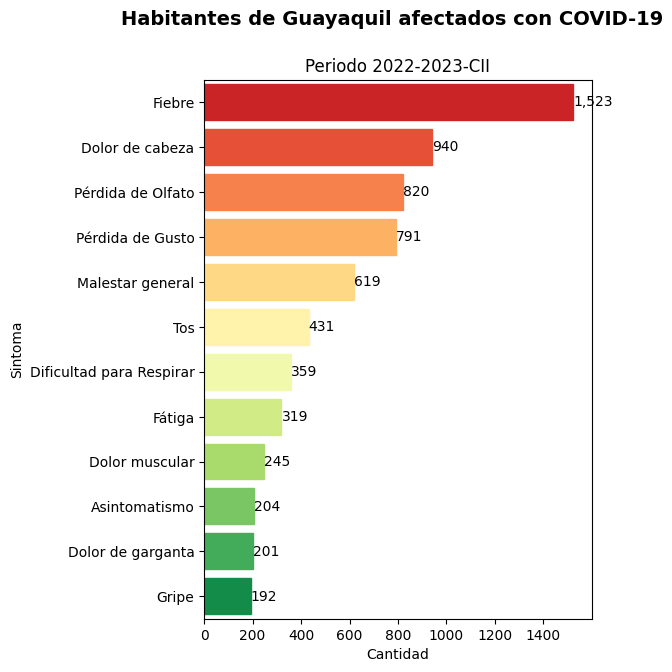

<Figure size 640x480 with 0 Axes>

In [284]:
import seaborn as sns
import pandas as pd

count_ages = datos_totales_sint[lista_col]
namesbars = df_Síntomas[lista_col].columns

# Ordenar los datos de manera descendente
sorted_data = count_ages.sort_values(ascending=False)

# Crear un dataframe con los datos ordenados
df_sorted = pd.DataFrame({'Sintoma': sorted_data.index, 'Cantidad': sorted_data.values})

# Definir la paleta de colores
color_palette = sns.color_palette("RdYlGn", len(df_sorted))

# Crear el gráfico de barras horizontales
plt.figure(figsize=(5, 7))
sns.barplot(x='Cantidad', y='Sintoma', data=df_sorted, palette=color_palette)

# Asignar colores a las barras según los valores
for i, bar in enumerate(plt.gca().patches):
    color = color_palette[i] if i < len(color_palette) else color_palette[-1]
    bar.set_color(color)

    # Agregar el valor numérico a la derecha de la barra
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width()):,}', ha='left', va='center')

plt.title('Periodo 2022-2023-CII')
plt.suptitle('Habitantes de Guayaquil afectados con COVID-19', fontsize=14, fontweight='bold')

plt.xlabel('Cantidad')
plt.ylabel('Sintoma')

plt.show()
plt.savefig('Sintomas relevantes de habitantes afectados con covid19 2021-2022')


#**Analisis de Frecuencia**

In [285]:
df_Síntomas.iloc[ : , 0:13]

,No.,Fecha Encuesta,1. ¿Ciudad que reside?,2. Ha tenido coronavirus?,3. Seleccione la Edad,4. ¿Género?,5. ¿Qué variante del Virus lo contagio?,6. ¿Fecha de contagio?,7. ¿Intensidad de los sí­ntomas?,8. ¿Lugar de contagio?,9. ¿Cuantas dosis tenia aplicadas previo a contagiarse?,"10. ¿Qué vacuna recibió, previo a contagiarse?",11. ¿Qué síntomas tuvo?
0,1,2021-09-12 10:41:46,Guayaquil,Si,Entre 26 a 64 años,M,Alfa,2021-03-16 00:00:00,Fuerte,Trabajo,0,Astrazeneca,"FALTA DE AIRE, PERDIDA DEL GUSTO, CANSANCIO EX..."
1,2,2021-09-12 14:21:34,Guayaquil,Si,Entre 26 a 64 años,F,Alfa,2020-03-12 00:00:00,Fuerte,OTRO,0,Sinovac,"Falta de aire, fiebre alta, mucho dolor de cuerpo"
2,3,2021-09-12 16:21:57,Guayaquil,Si,Entre 18 a 25 años,F,No Sabe,2020-03-19 00:00:00,Leve,Medio de Trasporte,0,Sinovac,Perdida del gusto y el olfato y tos por las no...
3,4,2021-09-12 16:25:21,Guayaquil,Si,Entre 26 a 64 años,M,Delta,2020-10-16 00:00:00,Leve,Fiesta,1,Astrazeneca,Problemas de respirar y malestar
4,5,2021-09-12 20:58:02,Guayaquil,Si,Entre 26 a 64 años,F,No Sabe,2020-03-30 00:00:00,Medio,Medio de Trasporte,0,No tenia ninguna vacuna puesta,"Dolor de cabeza, malestar, tos, dolor de garga..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2868,2869,12/23/2021 23:28:08,Guayaquil,Si,Entre 18 a 25 años,F,Alfa,2021-02-12 00:00:00,Leve,Medio de Trasporte,0,No tenia ninguna vacuna puesta,malestar y dolor de cabeza
2869,2870,12/23/2021 23:28:15,Guayaquil,Si,Entre 26 a 64 años,M,Delta,2021-03-22 00:00:00,Medio,Trabajo,1,Astrazeneca,dolor muscular
2870,2871,12/23/2021 23:31:59,Guayaquil,Si,Entre 26 a 64 años,M,Alfa,2020-08-01 00:00:00,Sin Sintomas,Trabajo,0,No tenia ninguna vacuna puesta,Ningún síntoma
2871,2872,12/23/2021 23:36:07,Guayaquil,Si,Entre 18 a 25 años,F,No Sabe,2020-06-12 00:00:00,Sin Sintomas,Medio de Trasporte,0,No tenia ninguna vacuna puesta,"Fiebre, dolor de cabeza"


In [286]:
df_Síntomas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2873 entries, 0 to 2872
Data columns (total 73 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   No.                                                      2873 non-null   int64 
 1   Fecha Encuesta                                           2873 non-null   object
 2   1. ¿Ciudad que reside?                                   2873 non-null   object
 3   2. Ha tenido coronavirus?                                2873 non-null   object
 4   3. Seleccione la Edad                                    2873 non-null   object
 5   4. ¿Género?                                              2873 non-null   object
 6   5. ¿Qué variante del Virus lo contagio?                  2873 non-null   object
 7   6. ¿Fecha de contagio?                                   2873 non-null   object
 8   7. ¿Intensidad de los sí­ntomas?      

In [287]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Columnas de entrada y columnas codificadas
columnas_entrada = ['1. ¿Ciudad que reside?', '2. Ha tenido coronavirus?', '3. Seleccione la Edad', '4. ¿Género?',
                    '5. ¿Qué variante del Virus lo contagio?',  '7. ¿Intensidad de los sí­ntomas?',
                    '8. ¿Lugar de contagio?']

columnas_codificadas = ['ciudad_reside_le', 'tuvo_coronavirus_le', 'Edad_le', 'Género_le', 'variante_Virus_tuvo_le',
                         'intensidad_sí­ntomas_le', 'Lugar_contagio']

# Crear nuevas columnas codificadas y asignarles los valores correspondientes
for col_entrada, col_codificada in zip(columnas_entrada, columnas_codificadas):
    le = LabelEncoder()
    df_Síntomas[col_codificada] = le.fit_transform(df_Síntomas[col_entrada])

In [288]:
df_Síntomas = df_Síntomas.rename(columns={'1. ¿Ciudad que reside?': 'Ciudad_reside'})
df_Síntomas = df_Síntomas.rename(columns={'2. Ha tenido coronavirus?': 'tuvo_COVID.19'})
df_Síntomas = df_Síntomas.rename(columns={'3. Seleccione la Edad': 'Rango_edad'})
df_Síntomas = df_Síntomas.rename(columns={'4. ¿Género?': 'Género'})
df_Síntomas = df_Síntomas.rename(columns={'5. ¿Qué variante del Virus lo contagio?': 'Variante_COVID.19'})
df_Síntomas = df_Síntomas.rename(columns={'7. ¿Intensidad de los sí­ntomas?': 'Intensidad_sí­ntomas'})
df_Síntomas = df_Síntomas.rename(columns={'8. ¿Lugar de contagio?': 'Lugar_contagio'})

In [289]:
# Renombrar la columna '9. ¿Cuantas dosis tenia aplicadas previo a contagiarse?' a 'Vacuna_recibió_antes_contagiarse'
df_Síntomas = df_Síntomas.rename(columns={'9. ¿Cuantas dosis tenia aplicadas previo a contagiarse?': 'Vacuna_recibió_antes_contagiarse'})
df_Síntomas = df_Síntomas.rename(columns={'6. ¿Fecha de contagio?': 'Fecha_contagio'})
df_Síntomas = df_Síntomas.rename(columns={'10. ¿Qué vacuna recibió, previo a contagiarse?': 'vacuna_recibió_ac'})

In [290]:
df_Síntomas = df_Síntomas.rename(columns={'11. ¿Qué síntomas tuvo?': 'síntomas'})

In [291]:
# Extraer el año de la columna '6. ¿Fecha de contagio?' y asignarlo a 'año_contagio'
df_Síntomas['Fecha_contagio'] = pd.to_datetime(df_Síntomas['Fecha_contagio'], errors='coerce')

# Truncar los nanosegundos a cero
df_Síntomas['Fecha_contagio'] = df_Síntomas['Fecha_contagio'].dt.round('s')

df_Síntomas['año_contagio'] = df_Síntomas['Fecha_contagio'].dt.year
df_Síntomas['mes_contagio'] = df_Síntomas['Fecha_contagio'].dt.month
df_Síntomas['dia_contagio'] = df_Síntomas['Fecha_contagio'].dt.day


In [292]:
#df_Síntomas['año_mes'] = df_Síntomas['año_contagio'].astype(str) + df_Síntomas['mes_contagio'].astype(str).str.zfill(2)

df_Síntomas['año_mes'] = (df_Síntomas['año_contagio']*100 + df_Síntomas['mes_contagio'])

In [293]:
df_Síntomas['año_mes']

0       202103
1       202003
2       202003
3       202010
4       202003
         ...  
2868    202102
2869    202103
2870    202008
2871    202006
2872    202107
Name: año_mes, Length: 2873, dtype: int64

In [294]:
valores_distintos = df_Síntomas['año_mes'].unique()
print(valores_distintos)

[202103 202003 202010 202104 202008 202012 202011 202004 201912 202101
 202112 202102 202201 202005 202009 202110 202107 202105 202111 202007
 202108 202209 202006 202109 202106 202001 202002 202204 202212 202202
 202206 201911]


In [295]:
conteo_por_tipo = df_Síntomas['año_mes'].value_counts()
print(conteo_por_tipo)

202003    324
202004    279
202103    226
202104    221
202005    202
202105    131
202101    122
202007    119
202006    116
202102    113
202106    111
202010    104
202112    104
202107     93
202008     88
202012     85
202009     84
202108     82
202011     73
202111     50
202109     45
202110     42
202002     30
202001     11
201912      9
202209      3
202201      1
202204      1
202212      1
202202      1
202206      1
201911      1
Name: año_mes, dtype: int64


In [296]:
df_Síntomas['año_mes'] = df_Síntomas['año_mes'].astype(int).astype(str)

In [297]:
df_Síntomas['año_mes']

0       202103
1       202003
2       202003
3       202010
4       202003
         ...  
2868    202102
2869    202103
2870    202008
2871    202006
2872    202107
Name: año_mes, Length: 2873, dtype: object

In [298]:
df_Síntomas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2873 entries, 0 to 2872
Data columns (total 84 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   No.                               2873 non-null   int64         
 1   Fecha Encuesta                    2873 non-null   object        
 2   Ciudad_reside                     2873 non-null   object        
 3   tuvo_COVID.19                     2873 non-null   object        
 4   Rango_edad                        2873 non-null   object        
 5   Género                            2873 non-null   object        
 6   Variante_COVID.19                 2873 non-null   object        
 7   Fecha_contagio                    2873 non-null   datetime64[ns]
 8   Intensidad_sí­ntomas              2873 non-null   object        
 9   Lugar_contagio                    2873 non-null   object        
 10  Vacuna_recibió_antes_contagiarse  2873 non-null 

In [299]:
# no soporta varios rangos, es una secuencia continua
#df_Síntomas2 = df_Síntomas.iloc[   :  , [1:6, 8:11, 72:82]]

#creo secuencia continua
#opcion 1: df_Síntomas2 = df_Síntomas.iloc[:, [2, 3, 4, 5, 6, 8, 9, 10, 7, 11, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]]

#opcion 2:
df_Síntomas2 = df_Síntomas.iloc[:, np.r_[3:6, 8:11, 7, 11, 72:82]]

In [300]:
# Seleccionar las columnas 'variante_Virus_tuvo_le' y 'Género_le' del DataFrame
df_Síntomas_sc = df_Síntomas.iloc[   :  ,np.r_[4:8, 83]]

In [301]:
df_Síntomas_sc

,Rango_edad,Género,Variante_COVID.19,Fecha_contagio,año_mes
0,Entre 26 a 64 años,M,Alfa,2021-03-16,202103
1,Entre 26 a 64 años,F,Alfa,2020-03-12,202003
2,Entre 18 a 25 años,F,No Sabe,2020-03-19,202003
3,Entre 26 a 64 años,M,Delta,2020-10-16,202010
4,Entre 26 a 64 años,F,No Sabe,2020-03-30,202003
...,...,...,...,...,...
2868,Entre 18 a 25 años,F,Alfa,2021-02-12,202102
2869,Entre 26 a 64 años,M,Delta,2021-03-22,202103
2870,Entre 26 a 64 años,M,Alfa,2020-08-01,202008
2871,Entre 18 a 25 años,F,No Sabe,2020-06-12,202006


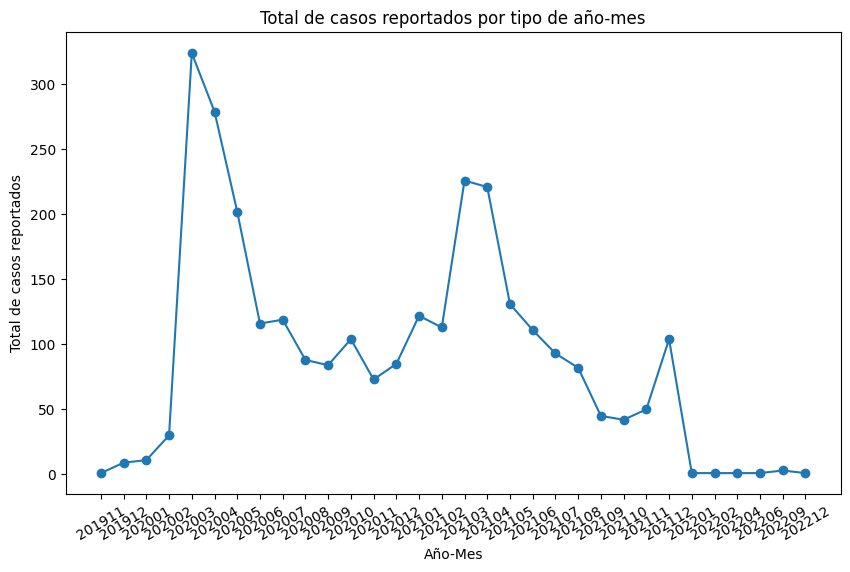

In [302]:
conteo_casos = df_Síntomas_sc['año_mes'].value_counts().sort_index()
import matplotlib.pyplot as plt

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Graficar el recuento de casos por tipo de 'año_mes'
plt.plot(conteo_casos.index, conteo_casos.values, marker='o')

# Configurar los ejes y el título del gráfico
plt.xlabel('Año-Mes')
plt.ylabel('Total de casos reportados')
plt.title('Total de casos reportados por tipo de año-mes')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=30)

# Mostrar el gráfico
plt.show()


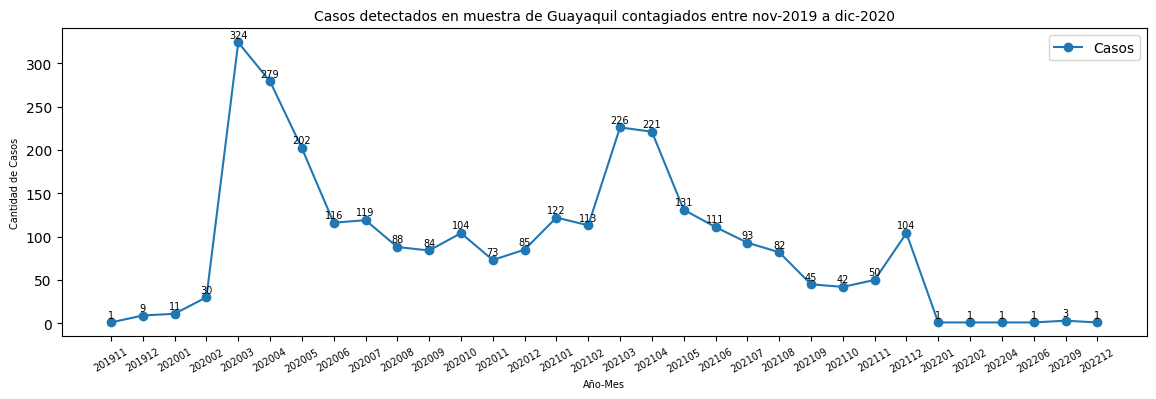

In [315]:
conteo_casos = df_Síntomas_sc['año_mes'].value_counts().sort_index()
import matplotlib.pyplot as plt

# Configurar el tamaño de la figura
plt.figure(figsize=(14, 4))

# Graficar el recuento de casos por tipo de 'año_mes'
plt.plot(conteo_casos.index, conteo_casos.values, marker='o')

# Configurar los ejes y el título del gráfico
plt.xlabel('Año-Mes', fontsize=7)
plt.ylabel('Cantidad de Casos', fontsize=7)
plt.title('Casos detectados en muestra de Guayaquil contagiados entre nov-2019 a dic-2020', fontsize=10)

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=30, fontsize=7)

# Mostrar los valores numéricos arriba de la curva lineal con desplazamiento
for x, y in zip(conteo_casos.index, conteo_casos.values):
    plt.text(x, y+3, str(y), ha='center', va='bottom', fontsize=7)

# Posicionar la leyenda en la esquina superior derecha
plt.legend(['Casos'], loc='upper right')

# Mostrar el gráfico
plt.show()


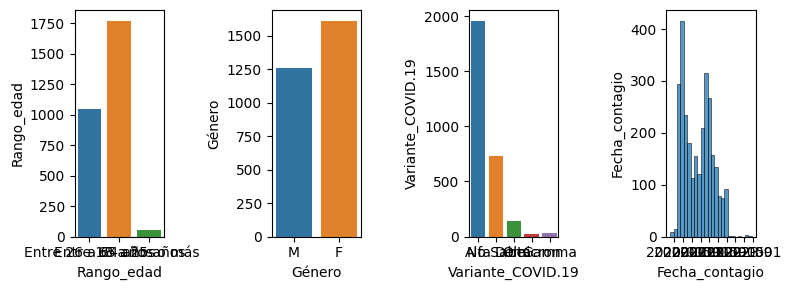

In [309]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que `train2` es tu dataframe original

# Configurar el tamaño de la figura
fig, axes = plt.subplots(1,4, figsize=(8, 3))

# Iterar sobre las columnas y crear los histogramas
for i, (column, ax) in enumerate(zip(df_Síntomas_sc.columns, axes.flatten())):
    # Verificar si la columna es numérica o categórica
    if df_Síntomas_sc[column].dtype == 'object':
        # Crear un gráfico de conteo para columnas categóricas
        sns.countplot(data=df_Síntomas_sc, x=column, ax=ax)
    else:
        # Crear un histograma para columnas numéricas
        sns.histplot(data=df_Síntomas_sc, x=column, ax=ax)

    # Establecer el título de la columna como etiqueta del eje y
    ax.set_ylabel(column)

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

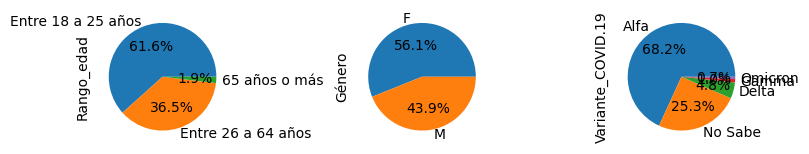

In [310]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que `train2` es tu dataframe original

# Configurar el tamaño de la figura
fig, axes = plt.subplots(1, 3, figsize=(8, 3))

# Iterar sobre las columnas y crear los gráficos
for i, (column, ax) in enumerate(zip(df_Síntomas_sc.columns, axes.flatten())):
    # Verificar si la columna es numérica o categórica
    if df_Síntomas_sc[column].dtype == 'object':
        # Crear un gráfico de pastel para columnas categóricas
        counts = df_Síntomas_sc[column].value_counts()
        ax.pie(counts, labels=counts.index, autopct='%1.1f%%')
        ax.set_aspect("equal")  # Asegurar que el gráfico sea circular
    else:
        # Crear un histograma para columnas numéricas
        sns.histplot(data=df_Síntomas_sc, x=column, ax=ax)

    # Establecer el título de la columna como etiqueta del eje y
    ax.set_ylabel(column)

    # Ajustar el tamaño de la letra de las etiquetas del eje X
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=6)

    # Ajustar el tamaño de la letra de las variables en los ejes X y Y
    ax.tick_params(axis='both', which='major', labelsize=8)

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


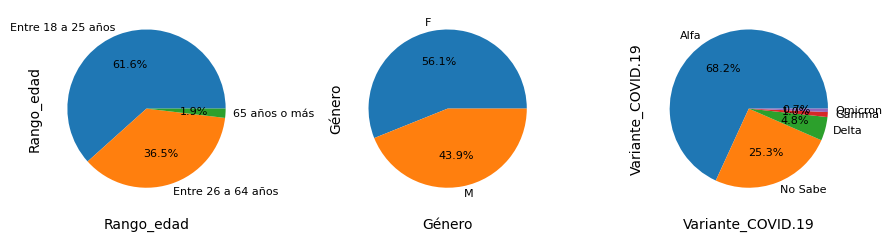

In [311]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que `train2` es tu dataframe original

# Configurar el tamaño de la figura
fig, axes = plt.subplots(1, 3, figsize=(9, 4))

# Iterar sobre las columnas y crear los gráficos
for i, (column, ax) in enumerate(zip(df_Síntomas_sc.columns, axes.flatten())):
    # Verificar si la columna es numérica o categórica
    if df_Síntomas_sc[column].dtype == 'object':
        # Crear un gráfico de pastel para columnas categóricas
        counts = df_Síntomas_sc[column].value_counts()
        ax.pie(counts, labels=counts.index, autopct='%1.1f%%', textprops={'fontsize': 8})
        ax.set_aspect("equal")  # Asegurar que el gráfico sea circular

        # Colocar el nombre de la variable debajo del gráfico de pastel
        ax.set_title(column, y=-0.15, fontsize=10)

    else:
        # Crear un histograma para columnas numéricas
        sns.histplot(data=df_Síntomas_sc, x=column, ax=ax)

    # Establecer el título de la columna como etiqueta del eje y
    ax.set_ylabel(column)

    # Ajustar el tamaño de la letra de las etiquetas del eje X
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=5)

    # Ajustar el tamaño de la letra de las variables en los ejes X y Y
    ax.tick_params(axis='both', which='major', labelsize=5)

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()
